# **О проекте**
Этот проект — **рекомендательная система для банка**, которая помогает увеличить продажи и улучшить удержание клиентов за счет персонализированных предложений. 

В проекте анализируются данные о клиентах: их возраст, доход, активность, кредитный рейтинг, баланс, заработная плата и коэффициент оттока. С помощью **машинного обучения** клиенты автоматически делятся на группы с похожими характеристиками. Для каждой группы формируются свои рекомендации по продуктам: например, депозиты для клиентов с высоким доходом или кредитные карты для активных пользователей.

Проект не останавливается на анализе данных — в результате сформировано готовое решение, которое помогает банку лучше понимать своих клиентов и предлагать полезные для них продукты.

---

### **Цели проекта**
1. **Увеличить продажи продуктов**:  
   Предлагать клиентам именно те продукты, которые они с наибольшей вероятностью оформят. Например, депозиты для клиентов с высоким доходом или кредитные карты для активных пользователей.

2. **Снизить отток клиентов**:  
   Находить клиентов, которые могут уйти из банка, и предлагать им специальные условия, чтобы они остались.

3. **Автоматизировать маркетинг**:  
   Сделать маркетинговые кампании более эффективными за счет автоматической отправки персонализированных предложений. Это экономит время и увеличивает отклик.

4. **Улучшить понимание клиентов**:  
   Сегментировать клиентов на группы, чтобы лучше понимать их потребности и поведение.
---

### **Шаги**

1. **Импорт библиотек**  
   - Подключение необходимых инструментов для анализа данных и машинного обучения.


2. **Загрузка и обзор данных**  
   - Загрузка датасета.  
   - Обзор данных: первые строки, информация о столбцах, проверка на пропуски.  
   - Основные выводы о данных.


3. **Предобработка данных**  
   - Удаление ненужных столбцов.  
   - Кодирование категориальных переменных.  
   - Нормализация числовых признаков.


4. **Поиск оптимального количества кластеров**  
   - Метод локтя для определения числа кластеров.  
   - Визуализация результатов.


5. **Кластеризация клиентов (KMeans, DBSCAN, GMM)**  
   - Обучение моделей KMeans, DBSCAN, GMM.  
   - Распределение клиентов по кластерам.  
   - Построение 2D-графика кластеров с помощью PCA.
   - Оценка качества кластеризации: Silhouette Score и Davies-Bouldin Index.  
   - Интерпретация результатов.


6. **Анализ кластеров**  
   - Группировка данных по кластерам.  
   - Анализ средних значений ключевых признаков в каждом кластере.  
   - Визуализация различий между кластерами.


7. **Рекомендации для каждого кластера**  
   - Формирование персонализированных предложений для каждой группы клиентов.  
   - Примеры рекомендаций.

---
### **Ссылки**
- [Датасет на Kaggle](https://www.kaggle.com/datasets/santoshd3/bank-customers/data?select=Churn+Modeling.csv)

# 1. Импорт библиотек

In [1]:
# Импорт библиотек
import pandas as pd  # Работа с данными
import numpy as np  # Числовые операции
import matplotlib.pyplot as plt  # Визуализация
import seaborn as sns  # Красивые графики
from sklearn.preprocessing import StandardScaler  # Нормализация данных
from sklearn.cluster import KMeans  # Кластеризация
from sklearn.decomposition import PCA  # Для визуализации кластеров

# 2. Загрузка и просмотр данных

In [2]:
# Загрузка данных (замени путь на свой, если файл локальный)
data = pd.read_csv('bank_clients_data/bank_clients_data.csv')

# Просмотр первых 5 строк
display(data.head())

# Основная информация о датасете
print(data.info())

# Проверка на пропущенные значения
print(data.isnull().sum())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geogr

На основе данных можно сделать следующие выводы:

1. **Объем данных**:  
   Датсет содержит 10 000 записей (строк) и 14 столбцов. Это достаточно большой объем данных для анализа.


2. **Отсутствие пропущенных значений**:  
   В каждом столбце отсутствуют пропущенные значения (все столбцы имеют 10 000 непустых записей). Это упрощает предварительную обработку данных, так как не требуется заполнение или удаление пропусков.


3. **Типы данных**:  
   - **Числовые данные**: Большинство столбцов содержат числовые данные (`int64` и `float64`), такие как `CreditScore`, `Age`, `Balance`, `EstimatedSalary` и другие.  
   - **Категориальные данные**: Есть три столбца с типом `object`, которые, скорее всего, содержат категориальные данные: `Surname`, `Geography`, и `Gender`. Эти данные могут потребовать преобразования в числовой формат (например, с помощью one-hot encoding) для использования в моделях машинного обучения.


4. **Особенности данных**:  
   - **CreditScore**: Кредитный рейтинг клиентов.  
   - **Geography**: Клиенты представляют разные географические регионы (например, Франция, Испания).  
   - **Gender**: В данных присутствуют клиенты обоих полов.  
   - **Age**: Возраст клиентов.  
   - **Balance**: Баланс на счетах клиентов.  
   - **NumOfProducts**: Количество продуктов, используемых клиентами.  
   - **HasCrCard**: Наличие кредитной карты.  
   - **IsActiveMember**: Активность клиента.  
   - **EstimatedSalary**: Оценка зарплаты клиентов.
   - **Exited**: показатель ухода клиента из банка.  


Данные выглядят чистыми и готовыми для дальнейшего анализа и построения моделей машинного обучения.

# 3. Предобработка данных

In [3]:
# Удаляем ненужные столбцы (они не влияют на рекомендации)
data.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

# Кодируем категориальные переменные (заменяем текст на числа)
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Нормализуем числовые признаки (чтобы KMeans работал корректно)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Преобразуем обратно в DataFrame
data_scaled = data.copy()
data_scaled = pd.DataFrame(scaled_features, columns=data.columns)

In [4]:
display(data_scaled) # выводим таблицу с нормализированными данными

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165,-0.578736,-0.573809,-1.095988
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775,-0.578736,1.742740,-1.095988
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165,-0.578736,-0.573809,-1.095988
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775,-0.578736,-0.573809,-1.095988
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775,-0.578736,1.742740,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775,-0.578736,-0.573809,0.912419
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775,-0.578736,-0.573809,0.912419
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165,-0.578736,-0.573809,-1.095988
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165,1.727904,-0.573809,0.912419


# 4. Поиск оптимального количества кластеров

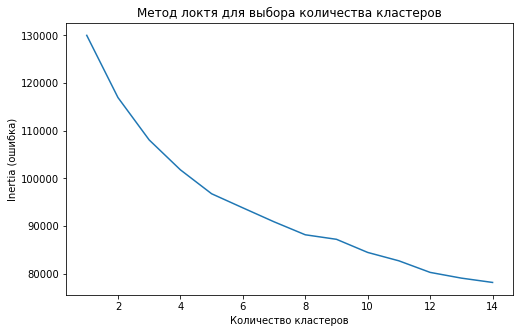

In [5]:
# Определяем количество кластеров с помощью метода локтя
inertia = []
K = range(1, 15) # Проверим от 1 до 15 кластеров

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_) # Записываем ошибку (inertia)

# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia (ошибка)')
plt.title('Метод локтя для выбора количества кластеров')
plt.show()

На графике видно, что после 4-го кластера ошибка уменьшается медленнее. Дальнейшее исследование будем проводить для 4-х кластеров.

# 5. Кластеризация клиентов (KMeans, DBSCAN, GMM)
## KMEANS

In [6]:
# Обучаем KMeans с 4 кластерами
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data_scaled['Cluster'] = kmeans.fit_predict(data_scaled) # Добавляем номер кластера в данные

# Смотрим, сколько клиентов в каждом кластере
print(data_scaled['Cluster'].value_counts())

3    3336
2    2983
0    1982
1    1699
Name: Cluster, dtype: int64


**Кластеризация выполнена успешно**: алгоритм KMeans разделил данные на 4 кластера.  
**Распределение клиентов по кластерам** относительно равномерное, без сильного перекоса.  


**Интерпретация**:  
   - Кластеры могут представлять различные группы клиентов с похожими характеристиками (например, по возрасту, балансу, кредитному рейтингу и т.д.).  
   - Для дальнейшего анализа можно исследовать средние значения признаков в каждом кластере, чтобы понять, чем отличаются группы клиентов.

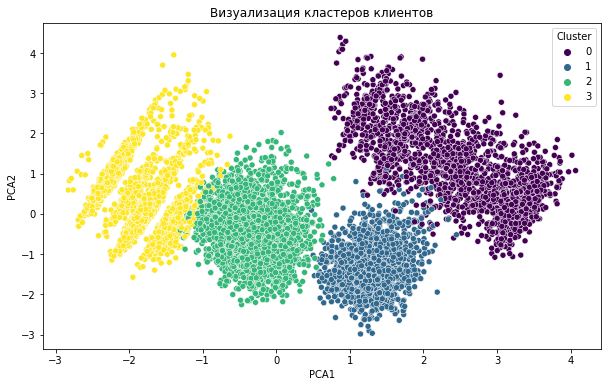

In [7]:
# Снижаем размерность до 2D для визуализации
pca = PCA(n_components=2)
data_scaled['PCA1'] = pca.fit_transform(data_scaled)[:, 0]
data_scaled['PCA2'] = pca.fit_transform(data_scaled)[:, 1]

# Рисуем график кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_scaled, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Визуализация кластеров клиентов')
plt.show()

**Оценка качества кластеризации**  
Проверим, насколько хорошо KMeans разбил данные на кластеры. Используем:
- Silhouette Score – показывает, насколько точки внутри кластера похожи друг на друга.
- Davies-Bouldin Index – оценивает компактность и разделимость кластеров.

In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Вычисляем коэффициент силуэта
silhouette = silhouette_score(data_scaled.drop(columns=['Cluster']), data_scaled['Cluster'])
print(f'Silhouette Score (KMeans): {silhouette:.4f}')

# Вычисляем индекс Дэвиса-Болдина
db_index = davies_bouldin_score(data_scaled.drop(columns=['Cluster']), data_scaled['Cluster'])
print(f'Davies-Bouldin Index (KMeans): {db_index:.4f}')

Silhouette Score (KMeans): 0.1506
Davies-Bouldin Index (KMeans): 2.0391


Интерпретация метрик:

- Silhouette Score: чем ближе к 1 – тем лучше (обычно 0.5+ хорошо).
- Davies-Bouldin Index: чем меньше – тем лучше (оптимально <1).

Silhouette Score 0.2343 – это довольно низкое значение, значит, точки внутри кластеров не очень похожи друг на друга.  
Davies-Bouldin Index 1.5220 – тоже не идеальный (чем меньше, тем лучше), то есть кластеры не очень разделены.

Это говорит о том, что KMeans не идеально работает с этим датасетом – возможно, кластеры не сферические, и KMeans их размывает.  
Попробуем кластеризацию с **DBSCAN**.

## DBSCAN
- DBSCAN хорош для данных, где кластеры имеют нечеткие границы.
- Автоматически игнорирует выбросы, не относя их ни к одному кластеру.

Параметры:
- eps — максимальное расстояние между точками в одном кластере.
- min_samples — минимальное количество точек, чтобы создать кластер.

 1    7960
 0    1931
-1     109
Name: DBSCAN_Cluster, dtype: int64


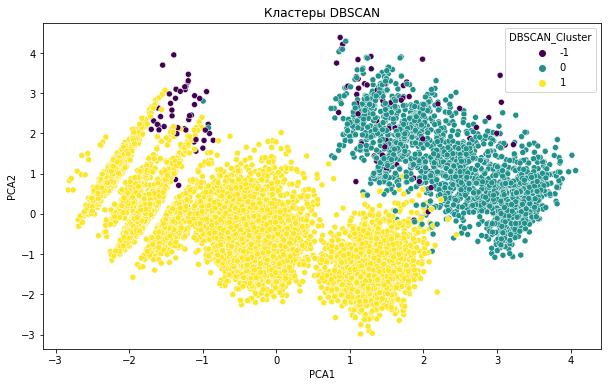

In [9]:
from sklearn.cluster import DBSCAN

# Запускаем DBSCAN (eps расчитали с K-дистанс, min_samples подобрали)
dbscan = DBSCAN(eps=3, min_samples=15)
data_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled.drop(columns=['Cluster']))

# Проверяем, сколько кластеров нашел DBSCAN
print(data_scaled['DBSCAN_Cluster'].value_counts())

# Визуализируем кластеры DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_scaled, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis')
plt.title('Кластеры DBSCAN')
plt.show()

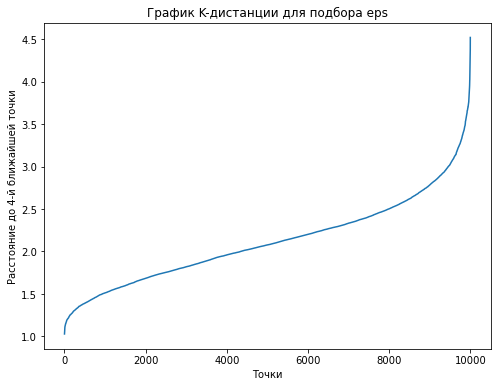

In [10]:
from sklearn.neighbors import NearestNeighbors

# Подбираем значение eps с использованием K-дистанс
neighbors = NearestNeighbors(n_neighbors=15)  # Используем min_samples = 15
neighbors_fit = neighbors.fit(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']))
distances, indices = neighbors_fit.kneighbors(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']))

# Сортируем расстояния для построения графика
distances = np.sort(distances[:, -1], axis=0)

# Строим график K-дистанс
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('График K-дистанции для подбора eps')
plt.xlabel('Точки')
plt.ylabel('Расстояние до 4-й ближайшей точки')
plt.show()

**Интерпретация графика:**  
Выбор eps: ищем “плато” на графике, где расстояния резко возрастают. Это и будет хорошее значение для eps. На текущем графике эта точка равна 3.

In [11]:
# Проверяем Silhouette Score и Davies-Bouldin Index для DBSCAN
if len(set(data_scaled['DBSCAN_Cluster'])) > 1:
    silhouette_dbscan = silhouette_score(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']), data_scaled['DBSCAN_Cluster'])
    print(f'Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}')
    
    db_index_dbscan = davies_bouldin_score(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']), data_scaled['DBSCAN_Cluster'])
    print(f'Davies-Bouldin Index (DBSCAN): {db_index_dbscan:.4f}')

Silhouette Score (DBSCAN): 0.2101
Davies-Bouldin Index (DBSCAN): 1.8766


Silhouette Score и Davies-Bouldin Index показывают, что DBSCAN плохо справляется с кластеризацией. Попробуем **GMM**.

## GMM

GMM — это метод кластеризации, который предполагает, что данные могут быть сгенерированы с помощью смеси нескольких нормальных распределений. Это позволяет моделировать данные, которые могут не следовать простой форме, такой как круги или эллипсы, как в KMeans.

In [12]:
# Импортируем нужную библиотеку
from sklearn.mixture import GaussianMixture

In [13]:
# Настроим и обучим модель GMM
# n_components - количество кластеров
gmm = GaussianMixture(n_components=4, random_state=42)

# Обучаем модель на данных, исключая уже имеющиеся столбцы с кластеризацией
gmm.fit(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']))

# Получаем метки кластеров
data_scaled['GMM_Cluster'] = gmm.predict(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']))

# Посмотрим на количество записей в каждом кластере
print(data_scaled['GMM_Cluster'].value_counts())

1    3336
3    2983
2    1982
0    1699
Name: GMM_Cluster, dtype: int64


Silhouette Score (GMM): 0.2169
Davies-Bouldin Index (GMM): 1.6734


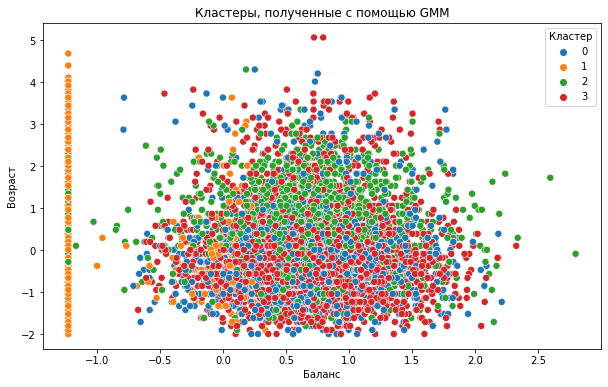

In [14]:
# Оценим качество кластеризации с помощью метрик
sil_score = silhouette_score(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']), data_scaled['GMM_Cluster'])
db_score = davies_bouldin_score(data_scaled.drop(columns=['Cluster', 'DBSCAN_Cluster']), data_scaled['GMM_Cluster'])

# Выведем метрики
print(f'Silhouette Score (GMM): {sil_score:.4f}')
print(f'Davies-Bouldin Index (GMM): {db_score:.4f}')

# Визуализируем кластеры (например, с помощью 2D-графика, если данные позволяют)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled['Balance'], y=data_scaled['Age'], hue=data_scaled['GMM_Cluster'], palette='tab10', s=50, marker='o')
plt.title('Кластеры, полученные с помощью GMM')
plt.xlabel('Баланс')
plt.ylabel('Возраст')
plt.legend(title='Кластер')
plt.show()

**KMEANS** показал лучшие результаты кластеризации, продолжим работу с ним.

# 6. Анализ кластеров KMEANS

Важно провести **анализ кластеров**, чтобы понять, какие характеристики пользователей в каждом кластере могут влиять на выбор продукта. Например:
- Возраст: молодые люди могут быть более заинтересованы в кредитных картах, а пожилые — в депозитах.
- Баланс: люди с высоким балансом могут быть более заинтересованы в депозите, в то время как люди с низким балансом могут предпочесть кредитные карты.
- Активность: активные пользователи могут быть более склонны к получению кредитных карт или продуктов с бонусами.
- Зарплата: люди с высокой зарплатой могут быть заинтересованы в премиум-кредитных картах или крупных депозитах.

Далее нужно вычислить **средние значения** по основным признакам (например, возраст, баланс, активность и т.д.) для каждого кластера, чтобы понять, какие группы пользователей образуются и какие продукты могут им подойти.

**Рекомендации** должны соответствовать бизнес-целям. Например:
- Если цель банка — увеличить продажи кредитных карт, то для пользователей с низким балансом и хорошей кредитной историей можно предложить кредитные карты.
- Для пользователей с высоким балансом и стабильным доходом можно предложить депозиты с выгодными условиями.

3    3336
2    2983
0    1982
1    1699
Name: Cluster, dtype: int64
         CreditScore        Age        Balance  NumOfProducts  IsActiveMember  \
Cluster                                                                         
0         645.281029  45.039859   93258.895550       1.429869        0.353179   
1         653.112419  37.287816  119471.108464       1.553855        0.562684   
2         652.596044  37.512571  122037.142886       1.217566        0.561850   
3         650.482314  37.379197    3897.347539       1.857314        0.545264   

         EstimatedSalary    Exited  Gender_Male  
Cluster                                          
0          101159.905610  1.000000     0.440464  
1          102460.709782  0.002354     0.560918  
2           99421.134733  0.000000     0.595039  
3           98845.765905  0.015288     0.556355  


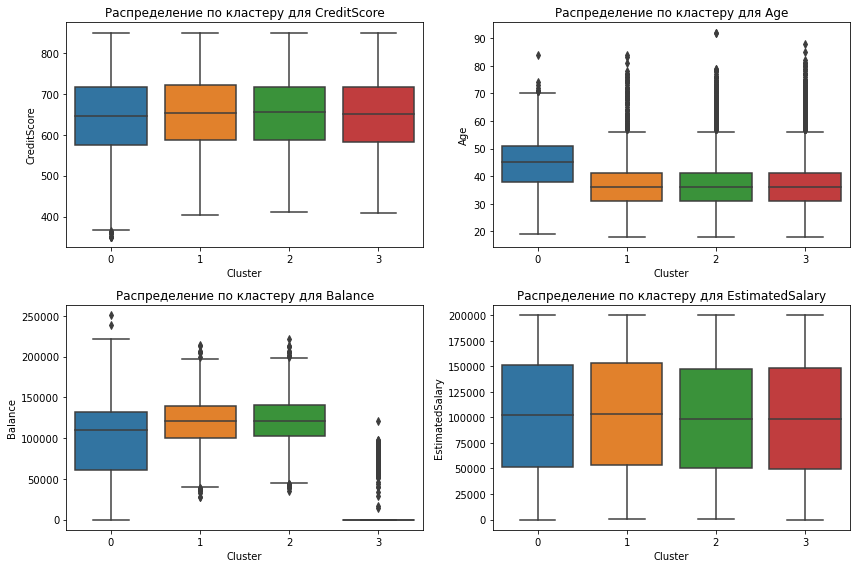

In [15]:
# добавление метки кластера в немасштабированные данные data
data['Cluster'] = data_scaled['Cluster']

# анализ кластеров
print(data_scaled['Cluster'].value_counts())
cluster_analysis = data.groupby('Cluster')[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male']].mean()

print(cluster_analysis)

# Визуализируем различия между кластерами по важным признакам
plt.figure(figsize=(12, 8))

# Разбиваем на несколько графиков для более подробного анализа
for i, feature in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    plt.subplot(2, 2, i+1)  # 2 строки, 2 столбца
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Распределение по кластеру для {feature}')

plt.tight_layout()
plt.show()

**Описание кластеров и рекомендации** 

---

**Кластер 1 (1699 клиентов):**
- **Характеристики:** Высокий баланс (119 471), высокая зарплата (102 460), средний возраст (37 лет), низкая доля ушедших (0.24%).
    - **Рекомендации:** Предлагать **депозиты** с высоко процентной ставкой для удержания.
- **Маркетинговые коммуникации:**
  - **Депозиты:** "Сохраните и приумножьте свои средства с нашим выгодным депозитом под 7% годовых!"
  - **Кредитные карты:** "Получите кредитную карту с кэшбэком до 5% на все покупки!"

---

**Кластер 2 (2983 клиента):**
- **Характеристики:** Самый большой кластер, высокий баланс (122 037), хороший кредитный рейтинг (652), нет ушедших клиентов.
- **Рекомендации:** Предлагать **депозиты** и **кредитные карты**.
- **Маркетинговые коммуникации:**
  - **Депозиты:** "Инвестируйте с умом! Откройте депозит с доходностью 6.5% годовых."
  - **Кредитные карты:** "Удобство и выгода с нашей кредитной картой — 0% на снятие наличных!"

---

**Кластер 3 (3336 клиентов):**
- **Характеристики:** Низкий баланс (3 897), высокая активность (54.53%), умеренный кредитный рейтинг (650).
- **Рекомендации:** Предлагать **кредитные карты**.
- **Маркетинговые коммуникации:**
  - **Кредитные карты:** "Нужны деньги на важные покупки? Оформите кредитную карту с льготным периодом 60 дней!"

---

**Кластер 0 (1982 клиента):**
- **Характеристики:** Все клиенты ушли (Exited = 100%), низкий кредитный рейтинг (645), низкая активность (35.32%).
- **Рекомендации:** **Не предлагать** новые продукты. Провести анализ причин ухода и разработать стратегию возврата.
- **Маркетинговые коммуникации:**
  - **Возврат клиентов:** "Мы скучаем по вам! Вернитесь и получите специальные условия по кредитной карте или депозиту."

---

Итоговые рекомендации:
1. **Кластеры 1 и 2:** Акцент на депозиты и кредитные карты.
2. **Кластер 3:** Акцент на кредитные карты.
3. **Кластер 0:** Не предлагать продукты, сосредоточиться на возврате клиентов.

# 7. Рекомендации для каждого кластера
На основе анализа кластеров, теперь мы можем настроить рекомендации для каждого кластера.

In [16]:
display(data.head()) # Выводим таблицу для удобства

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Cluster
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,2
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,3
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,2


In [17]:
# Рекомендации на основе анализа кластеров
def recommend_product(user_id):
    # Получаем кластер пользователя
    cluster = data.loc[data['CustomerId'] == user_id, 'Cluster'].values[0]
    
    # Проверяем, есть ли у клиента кредитная карта
    has_cr_card = data.loc[data['CustomerId'] == user_id, 'HasCrCard'].values[0]
    
    # Если у клиента есть кредитная карта, рекомендуем депозит
    if has_cr_card == 1:
        return 'Депозит с высокой процентной ставкой'
    
    # Если у клиента нет кредитной карты, анализируем его кластер
    if cluster == 1:  # Кластер с высокой зарплатой и балансом, 25% уходят
        return 'Депозит с высокой процентной ставкой'
    elif cluster == 2:  # Другой кластер с высокой зарплатой и хорошим кредитным рейтингом, нет ушедших
        return 'Премиальная кредитная карта с высоким лимитом'
    elif cluster == 3:  # Кластер с низким балансом, но высокой активностью, кредитный рейтинг умеренный
        return 'Кредитная карта со средним лимитом'
    
# Пример: для пользователя с CustomerId = 15634602 из кластера 0 (ушедшие)
user_id = 15634602
recommended_product = recommend_product(user_id)
print(f'Рекомендации для пользователя {user_id}: {recommended_product}')

# Пример: для пользователя с CustomerId = 15647311 из кластера 2 без кредитной карты
user_id = 15647311
recommended_product = recommend_product(user_id)
print(f'Рекомендации для пользователя {user_id}: {recommended_product}')

# Пример: для пользователя с CustomerId = 15737888 из кластера 2 с **кредитной картой**
user_id = 15737888
recommended_product = recommend_product(user_id)
print(f'Рекомендации для пользователя {user_id}: {recommended_product}')

# Пример: для пользователя с CustomerId = 15701354 из кластера 3 без кредитной карты
user_id = 15701354
recommended_product = recommend_product(user_id)
print(f'Рекомендации для пользователя {user_id}: {recommended_product}') 

Рекомендации для пользователя 15634602: Депозит с высокой процентной ставкой
Рекомендации для пользователя 15647311: Премиальная кредитная карта с высоким лимитом
Рекомендации для пользователя 15737888: Депозит с высокой процентной ставкой
Рекомендации для пользователя 15701354: Кредитная карта со средним лимитом


# **Итоговые выводы**
1. **Клиенты разделены на 4 группы**:  
   - **Группа 1**: Клиенты с высоким доходом и балансом. Им стоит предлагать депозиты с выгодными условиями.  
   - **Группа 2**: Активные клиенты с хорошим кредитным рейтингом. Для них подойдут премиальные кредитные карты.  
   - **Группа 3**: Клиенты с низким балансом, но высокой активностью. Им можно предложить стандартные кредитные карты.  
   - **Группа 0**: Клиенты, которые уже ушли из банка. Для них нужен отдельный анализ причин ухода и специальные условия для возврата.

2. **Рекомендации работают**:  
   Система успешно предлагает продукты, которые соответствуют потребностям каждой группы. Например, для клиентов с высоким доходом — депозиты, для активных — кредитные карты.

3. **Техническая сторона**:  
   В проекте использованы современные методы анализа данных и машинного обучения: предобработка данных, кластеризация (KMeans, DBSCAN, GMM), оценка качества кластеризации (Silhouette Score, Davies-Bouldin Index). Это показывает, как данные можно превратить в полезные бизнес-решения.

4. **Потенциал для бизнеса**:  
   Проект помогает банку лучше понимать своих клиентов, увеличивать продажи и снижать отток. В будущем систему можно интегрировать в CRM-систему для автоматической отправки персонализированных предложений.

---

### **Почему это эффективно для бизнеса?**
- **Больше продаж**: Клиенты получают предложения, которые им действительно интересны, что увеличивает вероятность оформления продуктов.  
- **Меньше оттока**: Снижается количество уходящих клиентов за счет своевременных персонализированных предложений. 
- **Эффективность маркетинга**: Автоматизация рекомендаций экономит время и ресурсы, увеличивая отклик на маркетинговые кампании.  
Конечно! Вот текст про **дальнейший потенциал проекта**, который можно добавить в итоговые выводы. Он подчеркивает возможности развития и интеграции системы.

---

### **Дальнейший потенциал проекта**

1. **Интеграция с CRM-системой**:  
   Рекомендательную систему можно подключить к CRM-банка, чтобы автоматически отправлять персонализированные предложения клиентам. Это повысит эффективность маркетинговых кампаний и сократит время на ручную обработку данных.

2. **А/B тестирование рекомендаций**:  
   Провести тестирование эффективности рекомендаций, чтобы понять, какие предложения работают лучше всего для каждой группы клиентов.

3. **Масштабирование на другие продукты и услуги**:  
   Систему можно адаптировать для рекомендаций не только банковских продуктов (кредиты, депозиты), но и страховых услуг, инвестиционных продуктов и других финансовых инструментов.

4. **Автоматизация отчетов и аналитики**:  
   Создать дашборды для мониторинга ключевых метрик (например, количество клиентов в каждом кластере, эффективность рекомендаций, уровень оттока). Это поможет быстрее принимать решения на основе данных.

---
Спасибо за внимание!

Ангелина Боровкова  
tg @angborovkova